<a href="https://colab.research.google.com/github/Srividhyak2011/Demo-Datascienceproject/blob/main/M5_MP5_NB_Covid_19_protein_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project Notebook 05: COVID-19: Viral proteins identification

## Learning Objectives

At the end of the experiment, you will be able to :

* Basic understanding of Covid-19 genome data
* Basic understanding of transcription and translation of DNA and mRNA
* Application of Biopython library

## Introduction
Viral proteins are proteins generated by a virus. As viruses hijack much of their host's cellular machinery to support their life cycle, they encode very few of their own genes; viral proteins are therefore generally structural components, for the viral envelope and capsid [[1]](https://www.nature.com/subjects/viral-proteins).


In this study, we will try to identify those viral proteins in the novel COVID-19 genome, the genome was sequenced from a sample of bronchoalveolar lavage fluid from a single patient who was a worker at the market and who was admitted to the Central Hospital of Wuhan on 26 December 2019. Comparative analysis of the COVID-19 viral proteins with the SARS, MERS and other bat coronaviruses proteins will be carried in this study.



## Materials and methods
* COVID-19 coronavirus genome sequence from the paper: [A new coronavirus associated with human respiratory disease in China](https://www.nature.com/articles/s41586-020-2008-3#rightslink).

* COVID-19 genome analysis was carried with [Biopython](https://biopython.org) libraries.


#### Install Biopython

In [1]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.9 MB/s eta 0:00:00


### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO


### Import the Genome data

In [3]:
#@title Download dataset
!gdown "1lCo_XLszPDzHeSTunGU_-sO3JiVMC9Rw"

Downloading...
From: https://drive.google.com/uc?id=1lCo_XLszPDzHeSTunGU_-sO3JiVMC9Rw
To: /content/MN908947.fna
100% 30.9k/30.9k [00:00<00:00, 50.1MB/s]


In [4]:
covid19 = SeqIO.read('MN908947.fna', "fasta")
record = SeqIO.read('MN908947.fna', "fasta")

## COVID-19: Genetic information

   
   Genome sequencing has increasingly become an important tool for studying disease outbreaks. The covid-19 genome used in this study was sequenced from a sample of bronchoalveolar lavage fluid from a single patient who was a worker at the market and who was admitted to the Central Hospital of Wuhan on 26 December 2019 [[2]](https://www.nature.com/articles/s41586-020-2008-3#rightslink).



### Q1 Read the Genome data and find the total number of genetic base (1 mark)

In [8]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
covid19 = SeqIO.read('/content/MN908947.fna', "fasta")


In [9]:
print(f'The genome of the virus causing Covid-19 (known as SARS-CoV-2) consists of {len(covid19)} genetic bases or letters.')

The genome of the virus causing Covid-19 (known as SARS-CoV-2) consists of 29903 genetic bases or letters.


The genome of the virus causing Covid-19 (known as SARS-CoV-2) consists of 29903 genetic bases or letters.

> ### 1.1- What is DNA?
***

DNA is the hereditary material in humans and almost all other organisms. Nearly every cell in a person’s body has the same DNA. Most DNA is located in the cell nucleus (where it is called nuclear DNA), but a small amount of DNA can also be found in the mitochondria (where it is called mitochondrial DNA or mtDNA) [[3]](https://ghr.nlm.nih.gov/primer/basics/dna).







The information in DNA is stored as a code made up of four chemical bases: adenine **A**, guanine **G**, cytosine **C**, and thymine **T** *(figure below)*. The order, or sequence, of these bases determines the information available for building and maintaining an organism, similar to the way in which letters of the alphabet appear in a certain order to form words and sentences.

Consider it, as if it was another language just like English or French, in this case, it has just 4 alphabet letters: **A T G C**, where a sequence of those letters, say **ATGCGCAAGTA**, is responsible of a functionality in your body, for example the secretion of hormones that control your mood.

*(The figure below shows the sequence of **A T C G** in the DNA)*



<div>
<img src="http://www.nature.com/scitable/content/ne0000/ne0000/ne0000/ne0000/104944953/73_1_2.jpg" width="600"/>
</div>



### Print first 50 letter of Covid-19 genome DNA(1 Mark)

In [10]:
covid_DNA= covid19.seq
print( covid_DNA[:50])

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTC


### Count the nucleotides frequency in the DNA (adenine **A**, guanine **G**, cytosine **C**, and thymine **T**) (1 Mark)

In [11]:
DNA= covid_DNA
nucleotides={}
for n in DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)

#Create a dataframe
nts= pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
nts= nts.rename(columns={0: 'frequency', 'index': 'nucleotides'})
nts=nts.sort_values(by=['frequency'], ascending=True)

{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}


### Create a dataframe and plot the nucleotide frequency (2 Marks)

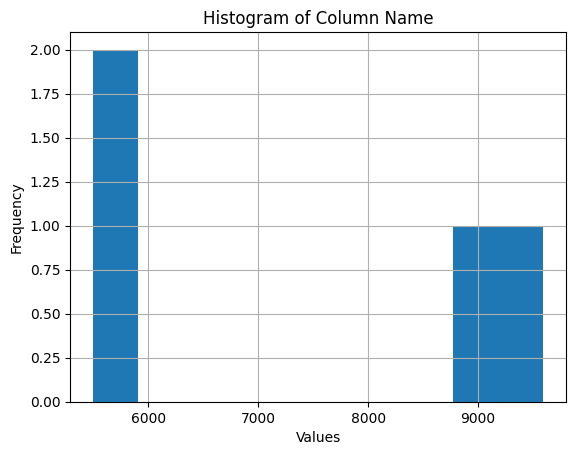

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
nts.hist(column='frequency')

# Set the title and axis labels
plt.title('Histogram of Column Name')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

*First observation:* The frequency of the nucleotides **A** and **T** is higher than the frequency of **C** and **G**. This is due to the nucleotides pairing.

This sequence of genetic bases contain all the information encoded in the virus. Understanding this genetic information is the key to find cures and vaccines. So, the question here is: **How do we extract information from this long sequence of letters?**

This process is called **gene expression**: Gene expression is the process by which **information** from a gene is used in the synthesis of a functional gene **product**. These products are often **proteins**.

- **TRANSCRIPTION**: DNA is copied out into a messenger RNA (mRNA)
- **TRANSLATION**: mRNA is translated into amino acids
- **AMINO ACID FOLDING**: A sequence of 20 or more amino acids *(the building blocks of proteins)* form a protein.




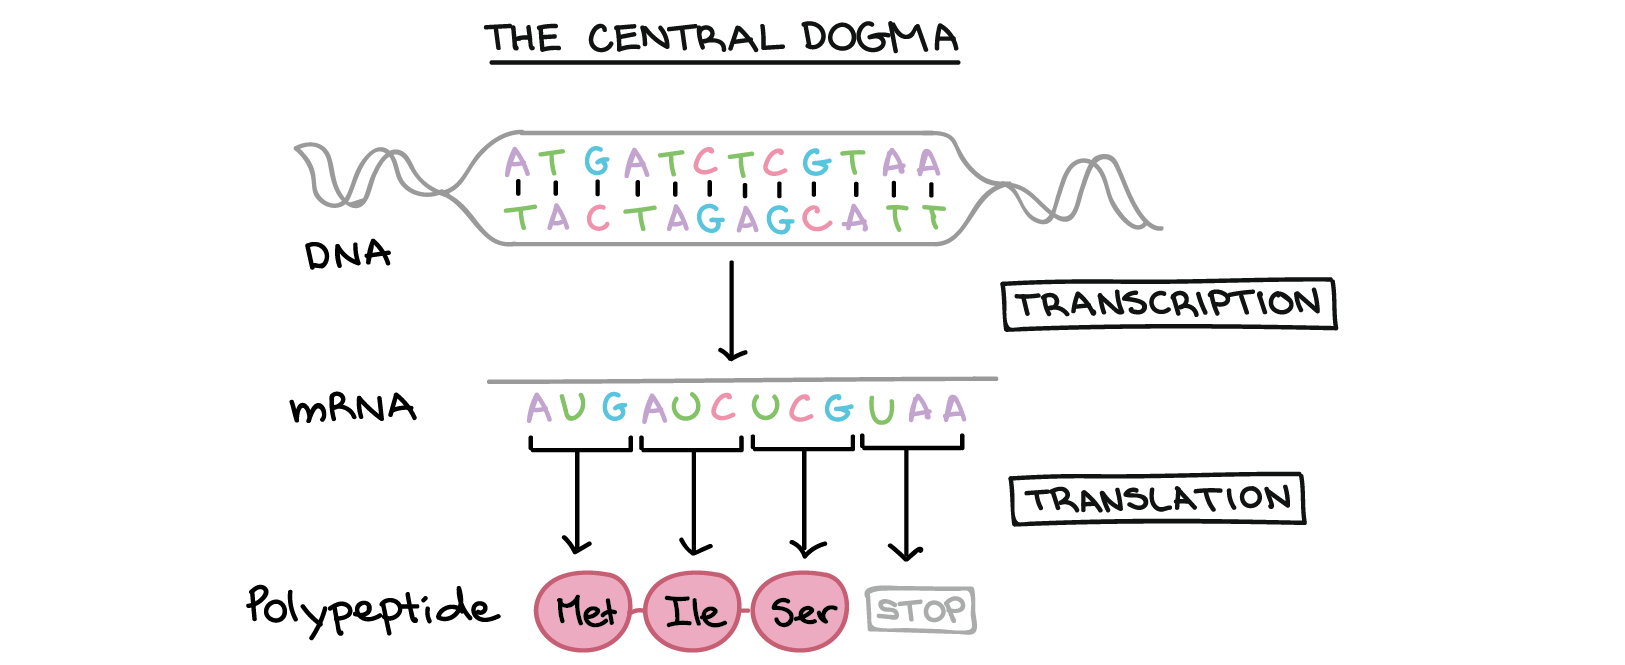

### Transcription
***
Transcription is the first step in gene expression. It involves copying a gene's DNA sequence to make an RNA molecule.
- Basically the mRNA is a copy of our DNA. However, in RNA, a base called uracil (U) replaces thymine (T) as the complementary nucleotide to adenine (that's the only difference, T is replaced by U).

### print the first 50  mRNA sequence from Covid-19 genome data and compare with frist 50 DNA sequence (2 marks)

In [19]:
covid_mRNA = covid_DNA.transcribe()
print(covid_mRNA[:50])

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUC


In [20]:
print(f'Covid-19 DNA: {covid_DNA[:50]}')
print(f'Covid-19 RNA: {covid_mRNA[:50]}')

Covid-19 DNA: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTC
Covid-19 RNA: AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUC


### 3- Translation
***
Translation is the process that takes the information passed from DNA as messenger RNA and turns it into a series of **amino acids**.

It is essentially a translation from one code **(nucleotide A T C G sequence)** to another code **(amino acid sequence)**.

How does this translation happen? As in any language, we need a dictionary for translation, in this case the amino acid dictionary is the table below. The nucleotides are read in groups of three "AUG GCC CAG UUA ...". Each triplet is called a codon and codes for a specific amino acid.





There are 61 codons for 20 amino acids, and each of them is "read" to specify a certain amino acid out of the
20 commonly found in proteins.

One codon, AUG, specifies the amino acid methionine and also acts as a start codon to signal the start of protein construction.

There are three more codons that do not specify amino acids. These stop codons, UAA, UAG, and UGA, tell the cell when a polypeptide is complete. All together, this collection of codon-amino acid relationships is called the genetic code, because it lets cells “decode” an mRNA into a chain of amino acids.

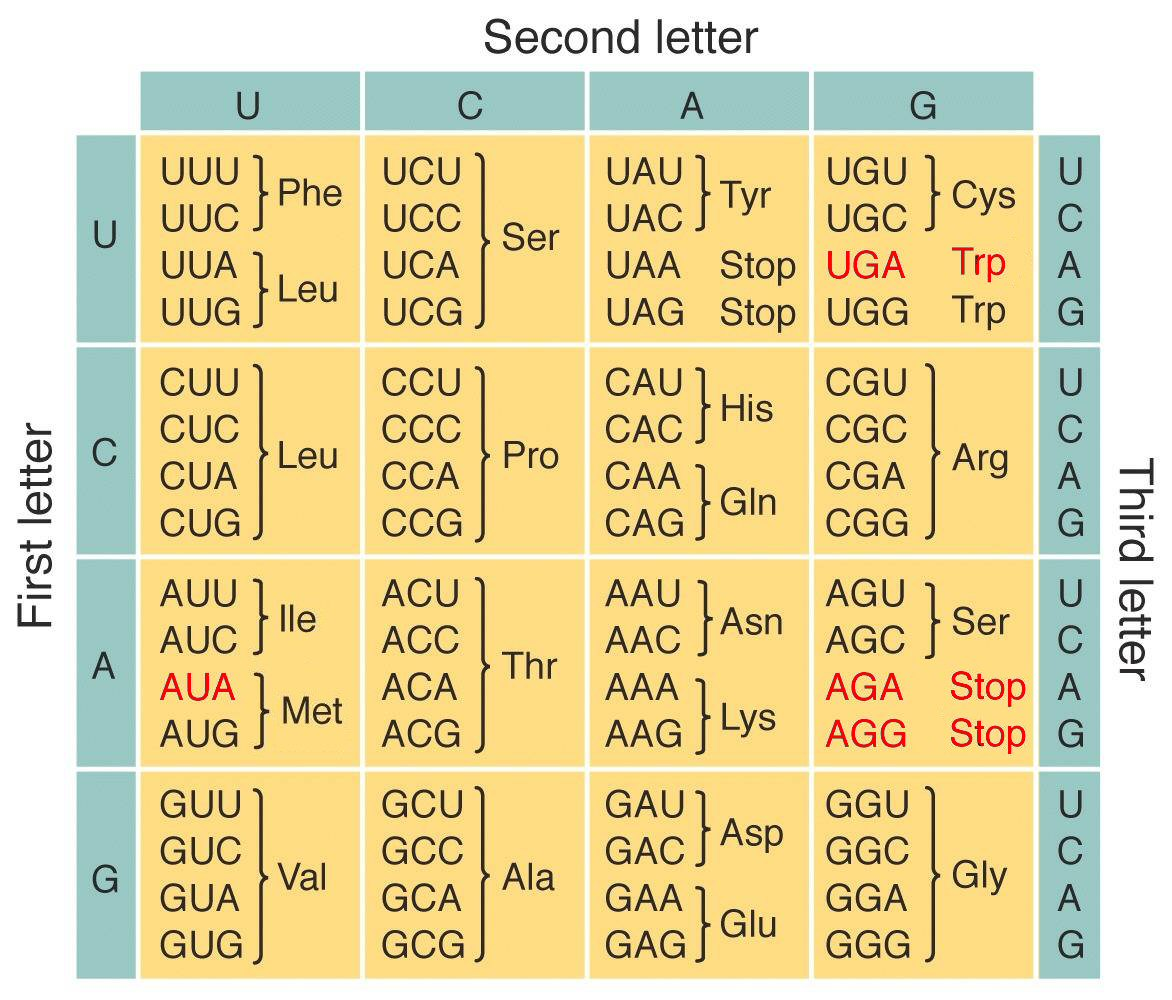

### Translate the mRNA to amino acid and find the total number of amino acid present in the Covid-19 Genome data (2 marks)

In [21]:
covid_aa = covid_mRNA.translate()
print(covid_aa[:99])

IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRE


In [22]:
print(f"Covid-19's genome has {len(covid_aa)} amino acids")

Covid-19's genome has 9967 amino acids


### Split the amino acid chain into indivisual chains and print first 10 chains (1 mark)

In [24]:
Proteins = covid_aa.split('*')
Proteins[:5]

[Seq('IKGLYLPR'),
 Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('CTHAV'),
 Seq('LITNYCR')]

### find the total number of aminoacid chains in Covid-19

In [26]:
print(f'We have {len(Proteins)} amino acid chains in the covid-19 genome')

We have 775 amino acid chains in the covid-19 genome


## Summary

   1- We started our analysis with the whole genome, that has \_\_\_ nucleotides.

  2- Transcribed the DNA or copied it out to an mRNA.

  3- The mRNA was translated to \_\_\_ amino acids.

  4- The amino acid sequences were split at the stop codons.

  5- We ended up with \_\_\_ amino acid chains.

# References:
***
[1] Viral proteins https://www.nature.com/subjects/viral-proteins

[2] A new coronavirus associated with human respiratory disease in China https://www.nature.com/articles/s41586-020-2008-3#rightslink

[3] What is DNA? https://ghr.nlm.nih.gov/primer/basics/dna

[4] Gene expression figure https://astrobiochem.wordpress.com/grade-10-biology/ch-11-gene-expression/

[5] Overview of Translation: https://www.khanacademy.org/science/biology/gene-expression-central-dogma/translation-polypeptides/a/translation-overview

[6] 3DMD geneti codon poster https://www.3dmoleculardesigns.com/Education-Products/Genetic-Codon-Poster.htm

[7] NIH. Open Reading Frames https://www.genome.gov/genetics-glossary/Open-Reading-Frame

[8] Protection from SARS coronavirus conferred by live measles vaccine expressing the spike glycoprotein. https://www.ncbi.nlm.nih.gov/pubmed/24606680

[9] Coronavirus figure https://www.prosci-inc.com/covid-19/

[10] Viral Protein: Definition, Components & Functions https://study.com/academy/lesson/viral-protein-definition-components-functions.html

[11] DNA figure 1 https://upload.wikimedia.org/wikipedia/commons/thumb/e/e2/Eukaryote_DNA-en.svg/1280px-Eukaryote_DNA-en.svg.png

[12] DNA figure 2 http://www.nature.com/scitable/content/ne0000/ne0000/ne0000/ne0000/104944953/73_1_2.jpg

[13] https://www.kaggle.com/freddieta/rna-similarity-sars-mers-cov2

[14] ACE-2: The Receptor for SARS-CoV-2 https://www.rndsystems.com/resources/articles/ace-2-sars-receptor-identified

[15] Prabakaran P, Gan J, Feng Y, Zhu Z, Choudhry V, et al. Structure of severe acute respiratory syndrome coronavirus receptor-binding domain complexed with neutralizing antibody. J Biol Chem. 2006;281:15829–15836. [[PubMed]](https://www.ncbi.nlm.nih.gov/pubmed/16597622)



[18] Pozzoli U, Menozzi G, Fumagalli M, et al. (2008). https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2292697/

